In [1]:
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import ZScaleInterval, simple_norm, MinMaxInterval, SqrtStretch
from astropy.visualization import ImageNormalize
from astropy.modeling import models, fitting
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [1]:
from pypeit.specutils import SpectrumList
spec = SpectrumList.read('/home/lupengjun/OII_emitter/spectra/pypeit_output/magellan_ldss3/Science_coadd/spec1d_ccd0105c1-ccd0107c1-Targ1 spec.fits')

AttributeError: 'NoneType' object has no attribute 'read'

In [4]:
hdu = fits.open('/home/lupengjun/OII_emitter/data/KCWI/feige34_cube_whitelight.fits')
hdu[0].data.shape

(140, 24)

In [2]:
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.linewidth'] = 1

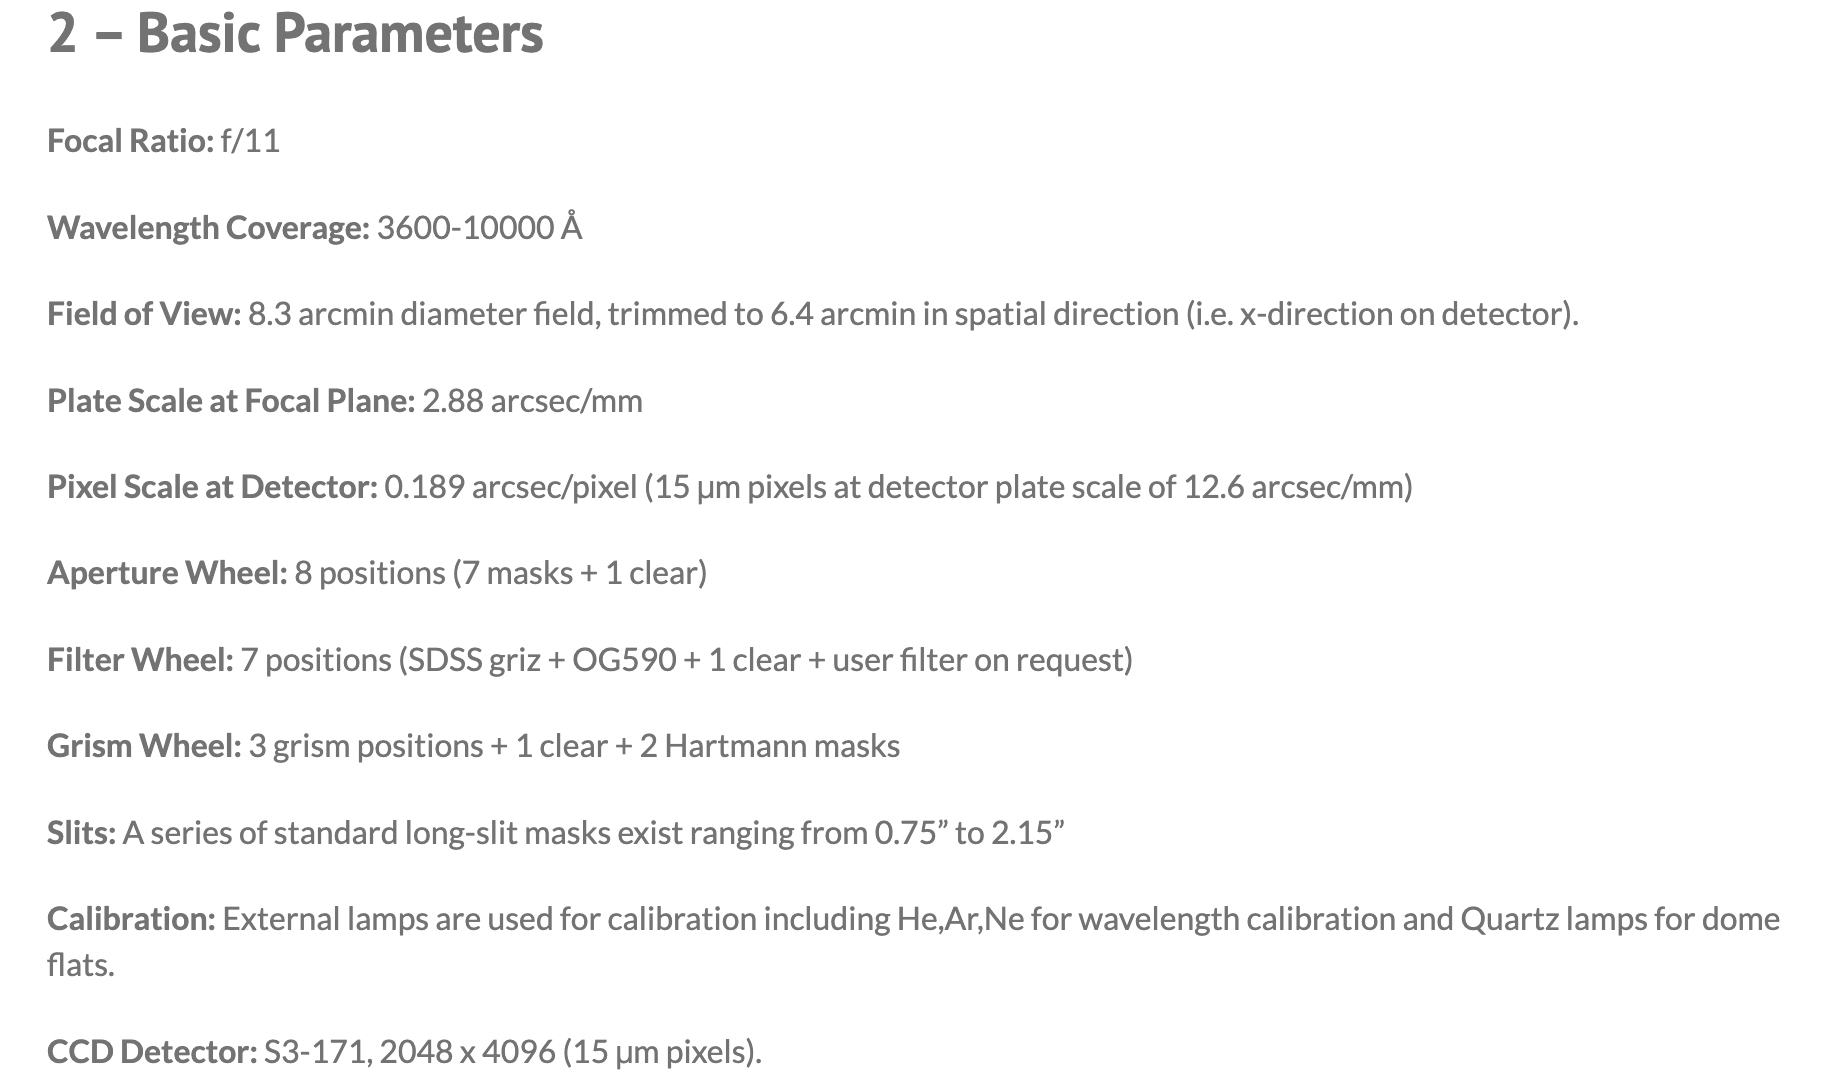

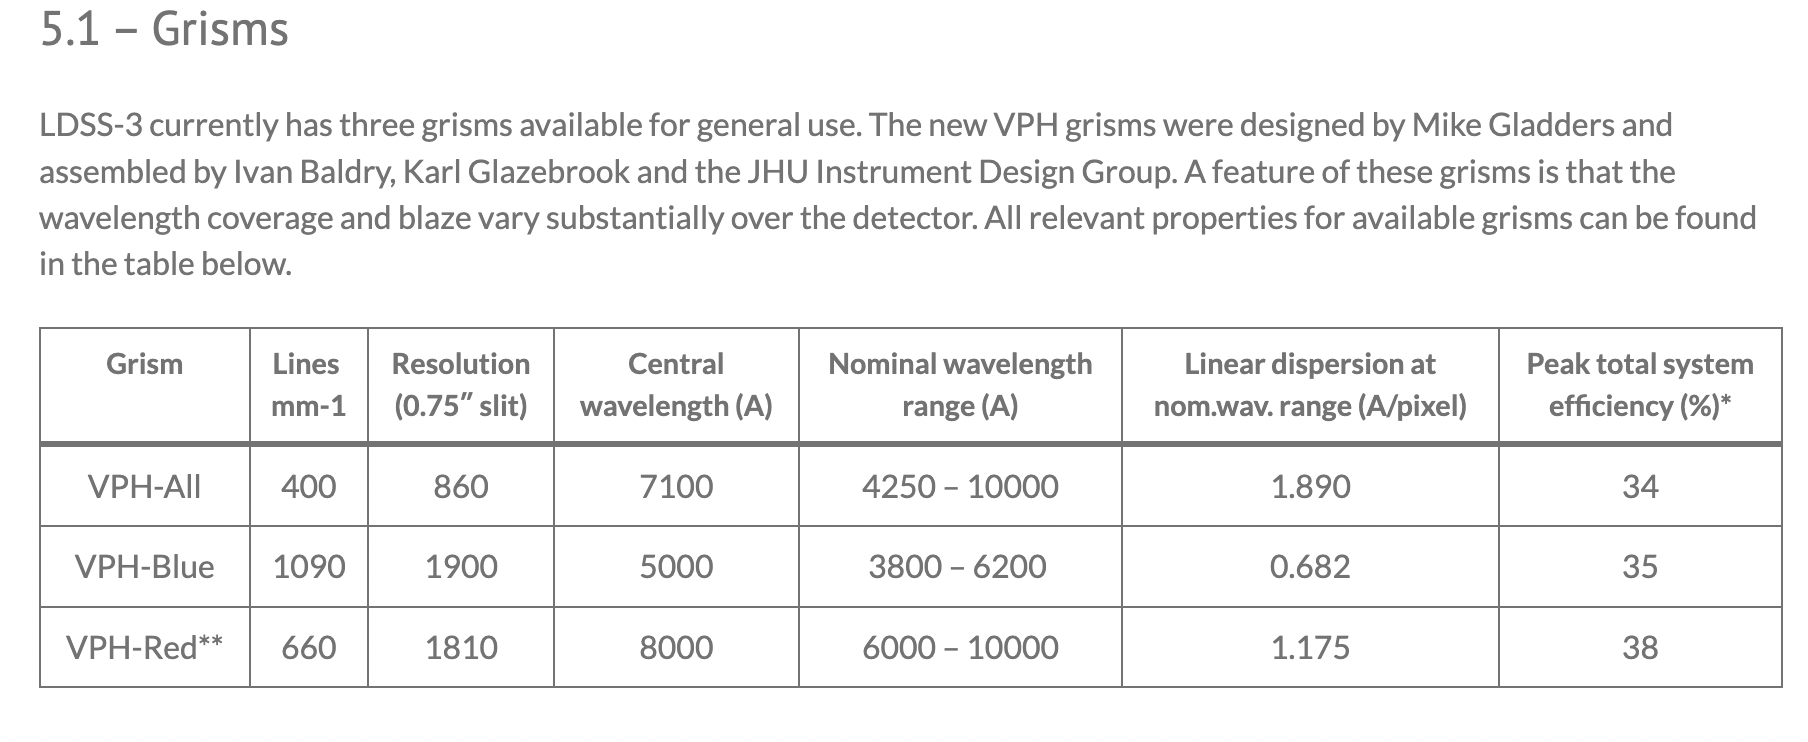

In [6]:
hdu = fits.open('/home/lupengjun/OII_emitter/spectra/pypeit_output/magellan_ldss3/Science_coadd/spec1d_ccd0105c1-ccd0107c1-Targ1 spec.fits')
hdu.info()

Filename: /home/lupengjun/OII_emitter/spectra/pypeit_output/magellan_ldss3/Science_coadd/spec1d_ccd0105c1-ccd0107c1-Targ1 spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  SPAT0518-SLIT0530-DET01    1 BinTableHDU     84   4049R x 24C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1K]   
  2  SPAT0569-SLIT0530-DET01    1 BinTableHDU     84   4049R x 24C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1K]   
  3  SPAT1001-SLIT0880-DET01    1 BinTableHDU     84   4049R x 24C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1K]   
  4  DET01-DETECTOR    1 BinTableHDU     55   1R x 17C   [K, K, L, L, D, D, D, D, D, D, D, D, K, 2D, 2D, K, 3A]   


In [7]:
tb = Table.read('/home/lupengjun/OII_emitter/spectra/pypeit_output/magellan_ldss3/Science_coadd/spec1d_ccd0105c1-ccd0107c1-Targ1 spec.fits', hdu=1)
tb

TRACE_SPAT,FWHMFIT,OPT_WAVE,OPT_FLAM,OPT_FLAM_SIG,OPT_FLAM_IVAR,OPT_COUNTS,OPT_COUNTS_IVAR,OPT_COUNTS_SIG,OPT_MASK,OPT_COUNTS_SKY,OPT_FRAC_USE,OPT_CHI2,BOX_NPIX,BOX_WAVE,BOX_FLAM,BOX_FLAM_SIG,BOX_FLAM_IVAR,BOX_COUNTS,BOX_COUNTS_IVAR,BOX_COUNTS_SIG,BOX_MASK,BOX_COUNTS_SKY,trace_spec
float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,int64
517.682,25.0,6666.120020839569,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,6666.120020839569,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0
517.682,25.0,6667.0242192849455,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,6667.039583056231,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,1
517.682,25.0,6668.2531698258745,-2.711883568336603,0.294370734848438,11.54013092467427,-375.6827664232808,0.0006013263967983145,40.77977879033657,True,168.79544227063235,0.5390583935283039,1.3263449170298096,8.75450793650792,6668.253362208863,-0.8494383879266151,0.146652625925485,46.496505316891515,-117.75148937170535,0.00241964282317709,20.329391005212372,True,42.66140068526216,2
517.682,25.0,6669.320683421867,-0.8076252471421806,0.27805714707750717,12.933970766034307,-112.15820665107736,0.0006706401276340896,38.61492823940627,True,9.212909763231586,0.47912504868536065,1.520478004296054,7.8730158730158735,6669.320756704474,-0.18843296950259839,0.13309789223264856,56.44918084607356,-26.18595044954871,0.002923039909492392,18.49620488465236,True,2.366502780398288,3
517.682,25.0,6670.3873658307075,-0.9897057851662167,0.28616990109878526,12.211024234818252,-137.783140316695,0.0006300458469791229,39.83950405108188,True,46.20906529187965,0.8147140672797565,1.51750889202513,15.0,6670.387648475912,-0.42297515254070644,0.19070989930335666,27.49498748401526,-58.925204683254705,0.001416710257017065,26.568037824613572,True,20.60301642508362,4
517.682,25.0,6671.307561406026,16.51557792726088,23.343101268194598,0.0018351978500016632,2304.125017913487,9.42884212014919e-08,3256.6479880159773,True,37.22759912832537,0.8682605389392117,0.002071879151398396,15.873015873015873,6671.287084911651,9.250331983567836,18.731619514117767,0.002850029431051846,1291.3700298421488,1.4623878742740855e-07,2614.98204539122,True,17.021288742107636,5
517.682,25.0,6672.7314843529875,-2.651764521049497,0.18957699821612103,27.82458626566535,-371.1645927323053,0.0014202524491353228,26.53488602617372,True,27.246543002223266,0.6695648786531642,2.184550053213028,11.873015873015873,6672.714068568047,-1.0997135327643606,0.11466953757359606,76.05081590810705,-154.0282149235887,0.003876702300202485,16.060859171366545,True,7.100154410022172,6
517.682,25.0,6674.023076092354,0.6344801880131038,1.1558574679770401,0.7484993600485386,89.07082732930225,3.798014268570688e-05,162.26382303578117,True,6.650166251660882,0.8683696217293565,0.0862229932872577,15.873015873015873,6674.006052893795,0.38970711722837637,0.8412512817046155,1.4130206938235312,54.74566024926565,7.160210683210041e-05,118.17812612714243,True,0.7028928259962219,7
517.682,25.0,6675.343846687263,-0.39630246655842627,1.5232066754580946,0.4310050227924575,-55.80286512950557,2.173816527597062e-05,214.4808671343944,True,-6.1502849203896,0.868347041612816,0.023420619022519504,15.873015873015873,6675.328828087184,-0.24657825498973351,1.195970517287433,0.6991317938404057,-34.74435571148997,3.5212760825930775e-05,168.51942226138047,True,-2.857949698675241,8


In [4]:
wave = tb['OPT_WAVE'] #optimal or box?
flux = tb['OPT_FLAM']
errors = tb['OPT_FLAM_SIG']

In [5]:
# O3_mask = (wave > 8380) & (wave < 8410)
O3_mask = (wave > 9525) & (wave < 9555)
O3_wave = wave[O3_mask]
O3_flux = flux[O3_mask]
O3_errors = errors[O3_mask]

In [6]:
Hbeta_mask = (wave > 9340) & (wave < 9370)
Hbeta_wave = wave[Hbeta_mask]
Hbeta_flux = flux[Hbeta_mask]
Hbeta_errors = errors[Hbeta_mask]

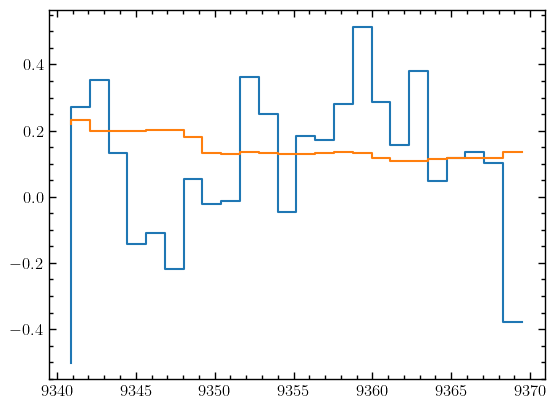

In [49]:
plt.step(Hbeta_wave, Hbeta_flux)
plt.step(Hbeta_wave, Hbeta_errors)

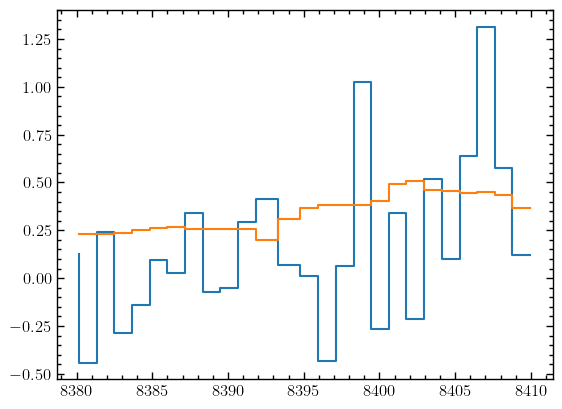

In [50]:
plt.step(O3_wave, O3_flux)
plt.step(O3_wave, O3_errors)

In [3]:
from pypeit import spec2dobj, specobj
# spec2DObj = spec2dobj.Spec2DObj.from_file('/home/lupengjun/OII_emitter/spectra/pypeit_output/magellan_ldss3/Science/spec2d_ccd0105c1-Targ1spec_LDSS3_85930515T125301.248.fits', detname='DET01')
spec2DObj = spec2dobj.Spec2DObj.from_file('/home/lupengjun/OII_emitter/spectra/pypeit_output/magellan_ldss3/Science_coadd/spec2d_ccd0105c1-ccd0107c1-Targ1 spec.fits', detname='DET01')
spec1DObj = specobj.SpecObj.from_file(ifile='/home/lupengjun/OII_emitter/spectra/pypeit_output/magellan_ldss3/Science_coadd/spec1d_ccd0105c1-ccd0107c1-Targ1 spec.fits')
slitmask = spec2DObj.slits.slit_img(flexure=spec2DObj.sci_spat_flexure)
sciimg = spec2DObj.sciimg
skymodel = spec2DObj.skymodel
objmodel = spec2DObj.objmodel
ivarmodel = spec2DObj.ivarmodel
bpmmask = spec2DObj.bpmmask
waveimg = spec2DObj.waveimg
img_gpm = spec2DObj.select_flag(invert=True)
model_gpm = img_gpm.copy()

[INFO]    :: Loading SpecObj from /home/lupengjun/OII_emitter/spectra/pypeit_output/magellan_ldss3/Science_coadd/spec1d_ccd0105c1-ccd0107c1-Targ1 spec.fits


In [38]:
np.unique(slitmask)

array([  -1,  180,  530,  880, 1230])

In [4]:
# objmask = slitmask == 705
objmask = slitmask == 530
objsci = (sciimg - skymodel) * model_gpm.astype(float)
objsci = np.ma.array(objsci, mask=~objmask)
objwave = np.ma.array(waveimg, mask=~objmask)
objwave_mask_OII = (objwave>7100) & (objwave<7260)
objwave_mask_OIII = (objwave>9560) & (objwave<9720)
objwave_window_OII = np.ma.array(objwave, mask=~objwave_mask_OII)
objwave_window_OIII = np.ma.array(objwave, mask=~objwave_mask_OIII)
objsci_OII = np.ma.array(objsci, mask=~objwave_mask_OII)
objsci_OIII = np.ma.array(objsci, mask=~objwave_mask_OIII)

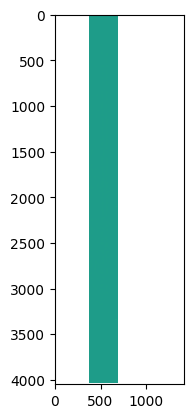

In [40]:
plt.imshow(objsci)

In [5]:
def plot_spec_2d_1d_fit(objsci, objwave, tb, wave_range, space_range, label='OII'):
    '''
    wave range in Angstrom, space range in pixel index
    '''
    if label=='OII': 
        label = '[OII] $\lambda\lambda3726,3729$'
        center_wave = (3726+3729)/2
    elif label=='OIII': 
        label = '[OIII] $\lambda5007$'
        center_wave = 5007
    else:
        label = label
        center_wave = np.mean(wave_range)
    #1d spectra
    wave = tb['OPT_WAVE'] #optimal or box?
    # wave = spec1DObj.OPT_WAVE
    flux = tb['OPT_FLAM']
    # flux = spec1DObj.OPT_FLAM
    errors = tb['OPT_FLAM_SIG']
    # errors = spec1DObj.OPT_FLAM_SIG
    mask = tb['OPT_MASK']
    # mask = spec1DObj.OPT_MASK
    wave_mask = (wave>wave_range[0]) & (wave<wave_range[1])
    wave_cut = wave[mask&wave_mask]
    flux_cut = flux[mask&wave_mask]
    errors_cut = errors[mask&wave_mask]
    #fitting emission line
    g_init = models.Gaussian1D(amplitude=1., mean=np.mean(wave_range), stddev=20)
    fit_g = fitting.LevMarLSQFitter(calc_uncertainties=True)
    g = fit_g(g_init, wave_cut, flux_cut, weights=1/errors_cut)
    #2d spectra
    wave_range_index = np.where((objwave<wave_range[1]) & (objwave>wave_range[0]))[0]
    wave_cut_index = [wave_range_index.min(), wave_range_index.max()]
    objsci_cutout = objsci.T[space_range[0]:space_range[1], wave_cut_index[0]:wave_cut_index[1]]
    #sigma clipping to determine the normalization
    mean, median, std = sigma_clipped_stats(objsci_cutout, sigma=2.0, maxiters=None)
    zscale_norm = ImageNormalize(vmin=median-2*std, vmax=median+3*std, interval=ZScaleInterval())
    #plotting
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3, 1]}, sharex=True, dpi=300)
    fig.subplots_adjust(hspace=0)
    ax0.imshow(objsci_cutout, norm=zscale_norm, cmap='gray_r', extent=[wave_range[0], wave_range[1], (space_range-np.mean(space_range))[0]*0.189, (space_range-np.mean(space_range))[1]*0.189])
    ax0.set_aspect('auto')
    ax0.set_ylabel('arcsec')
    # # xtick label color black but tick color white
    # ax0.tick_params(axis='x', colors='w', labelcolor='k', which='both')
    # ax0.tick_params(axis='y', colors='w', labelcolor='k', which='both')
    ax1.step(wave_cut, flux_cut, lw=1, label='Data', c='k')
    ax1.step(wave_cut, errors_cut, lw=1, label='Error', c='green')
    ax1.plot(wave_cut, g(wave_cut), lw=1.5, label='Model', c='r')
    ax1.set_xlim(wave_range[0], wave_range[1])
    ax1.set_ylim(-0.9, 2)
    ax1.set_ylabel('$F_\lambda (10^{-17} \\rm{erg~s^{-1}~cm^{-2}~Å^{-1}})$')
    ax1.text(wave_range[0]+5, 1.6, label, fontsize=20, color='red')
    ax1.text(wave_range[0]+5, 1.3, '$z=%.4f$'%(g.mean/center_wave-1), fontsize=20, color='red')
    ax1.legend()
    ax2.plot(wave_cut,  flux_cut-g(wave_cut), 'k.')
    ax2.axhline(0, color='red', linestyle='--')
    ax2.set_xlim(wave_range[0], wave_range[1])
    ax2.set_ylim(-0.6, 0.6)
    ax2.set_xlabel('Observed Wavelength $\lambda$(Å)')
    ax2.set_ylabel('Residuals')
    plt.show()
    
    return g.amplitude, g.mean, g.stddev, np.diag(g.cov_matrix.cov_matrix)

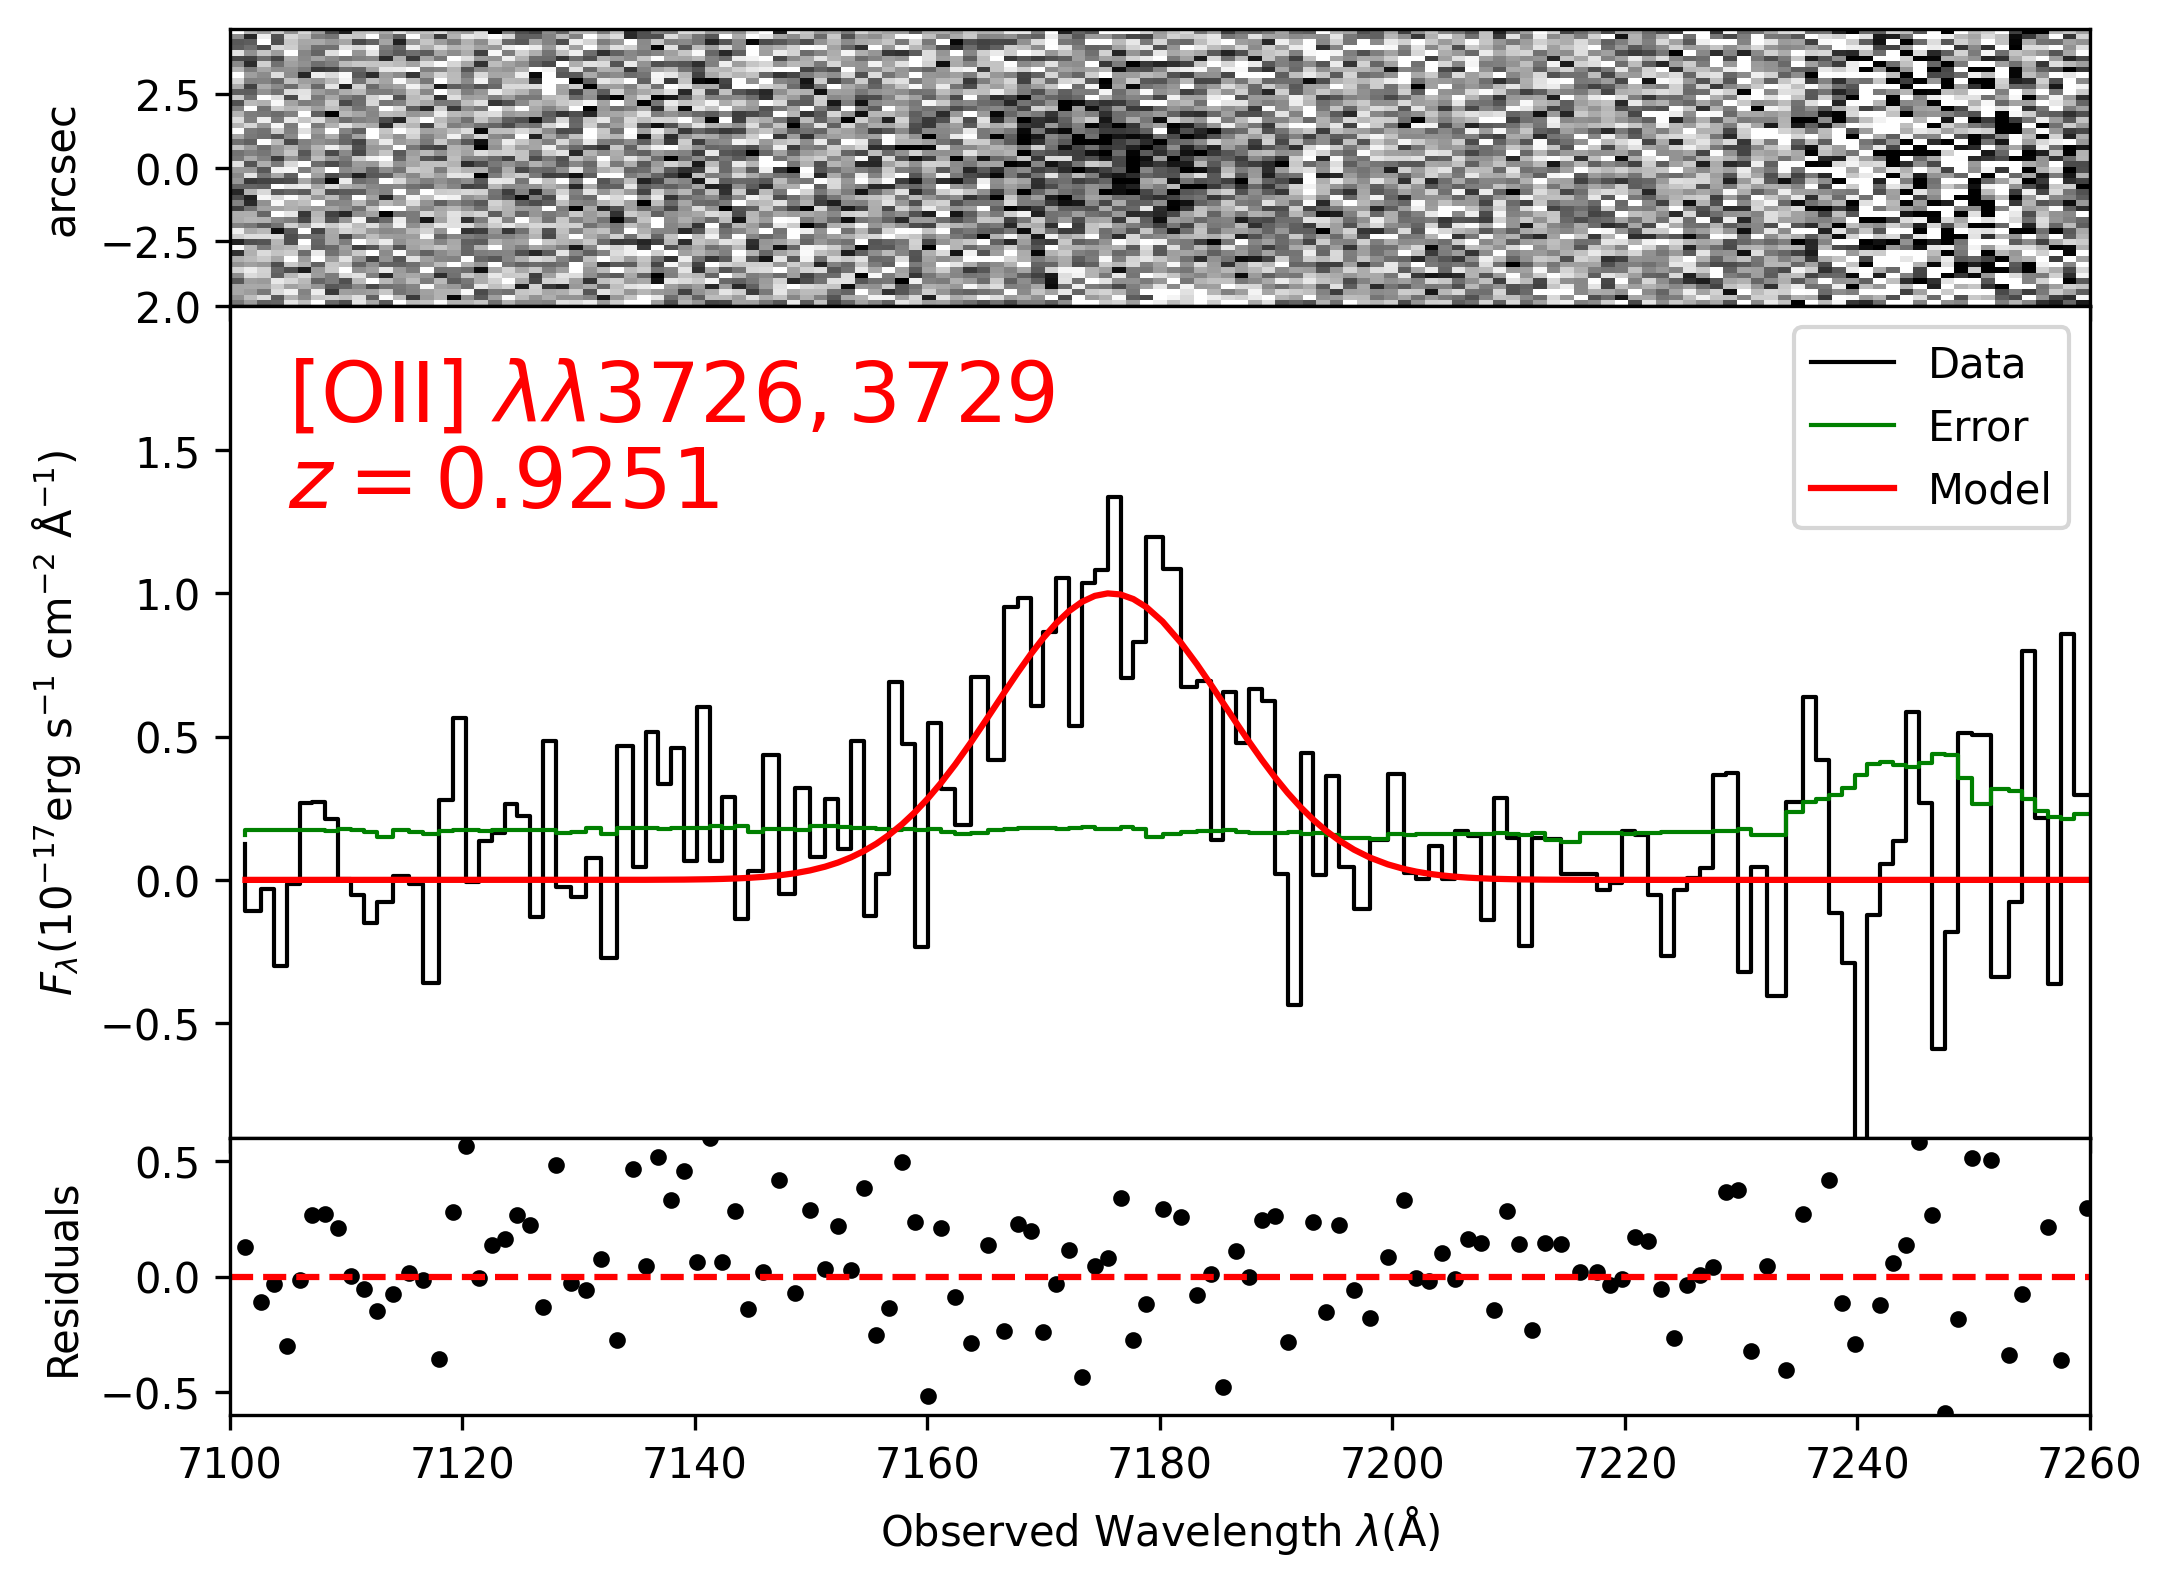

In [8]:
OII_wave_range = [7100, 7260]
# OII_space_range = [625, 675]
OII_space_range = [490, 540]
OII_flux, OII_wave, OII_sig, OII_error = plot_spec_2d_1d_fit(objsci, objwave, tb, OII_wave_range, OII_space_range, label='OII')
# g = plot_spec_2d_1d_fit(objsci, objwave, tb, OII_wave_range, OII_space_range, label='OII')

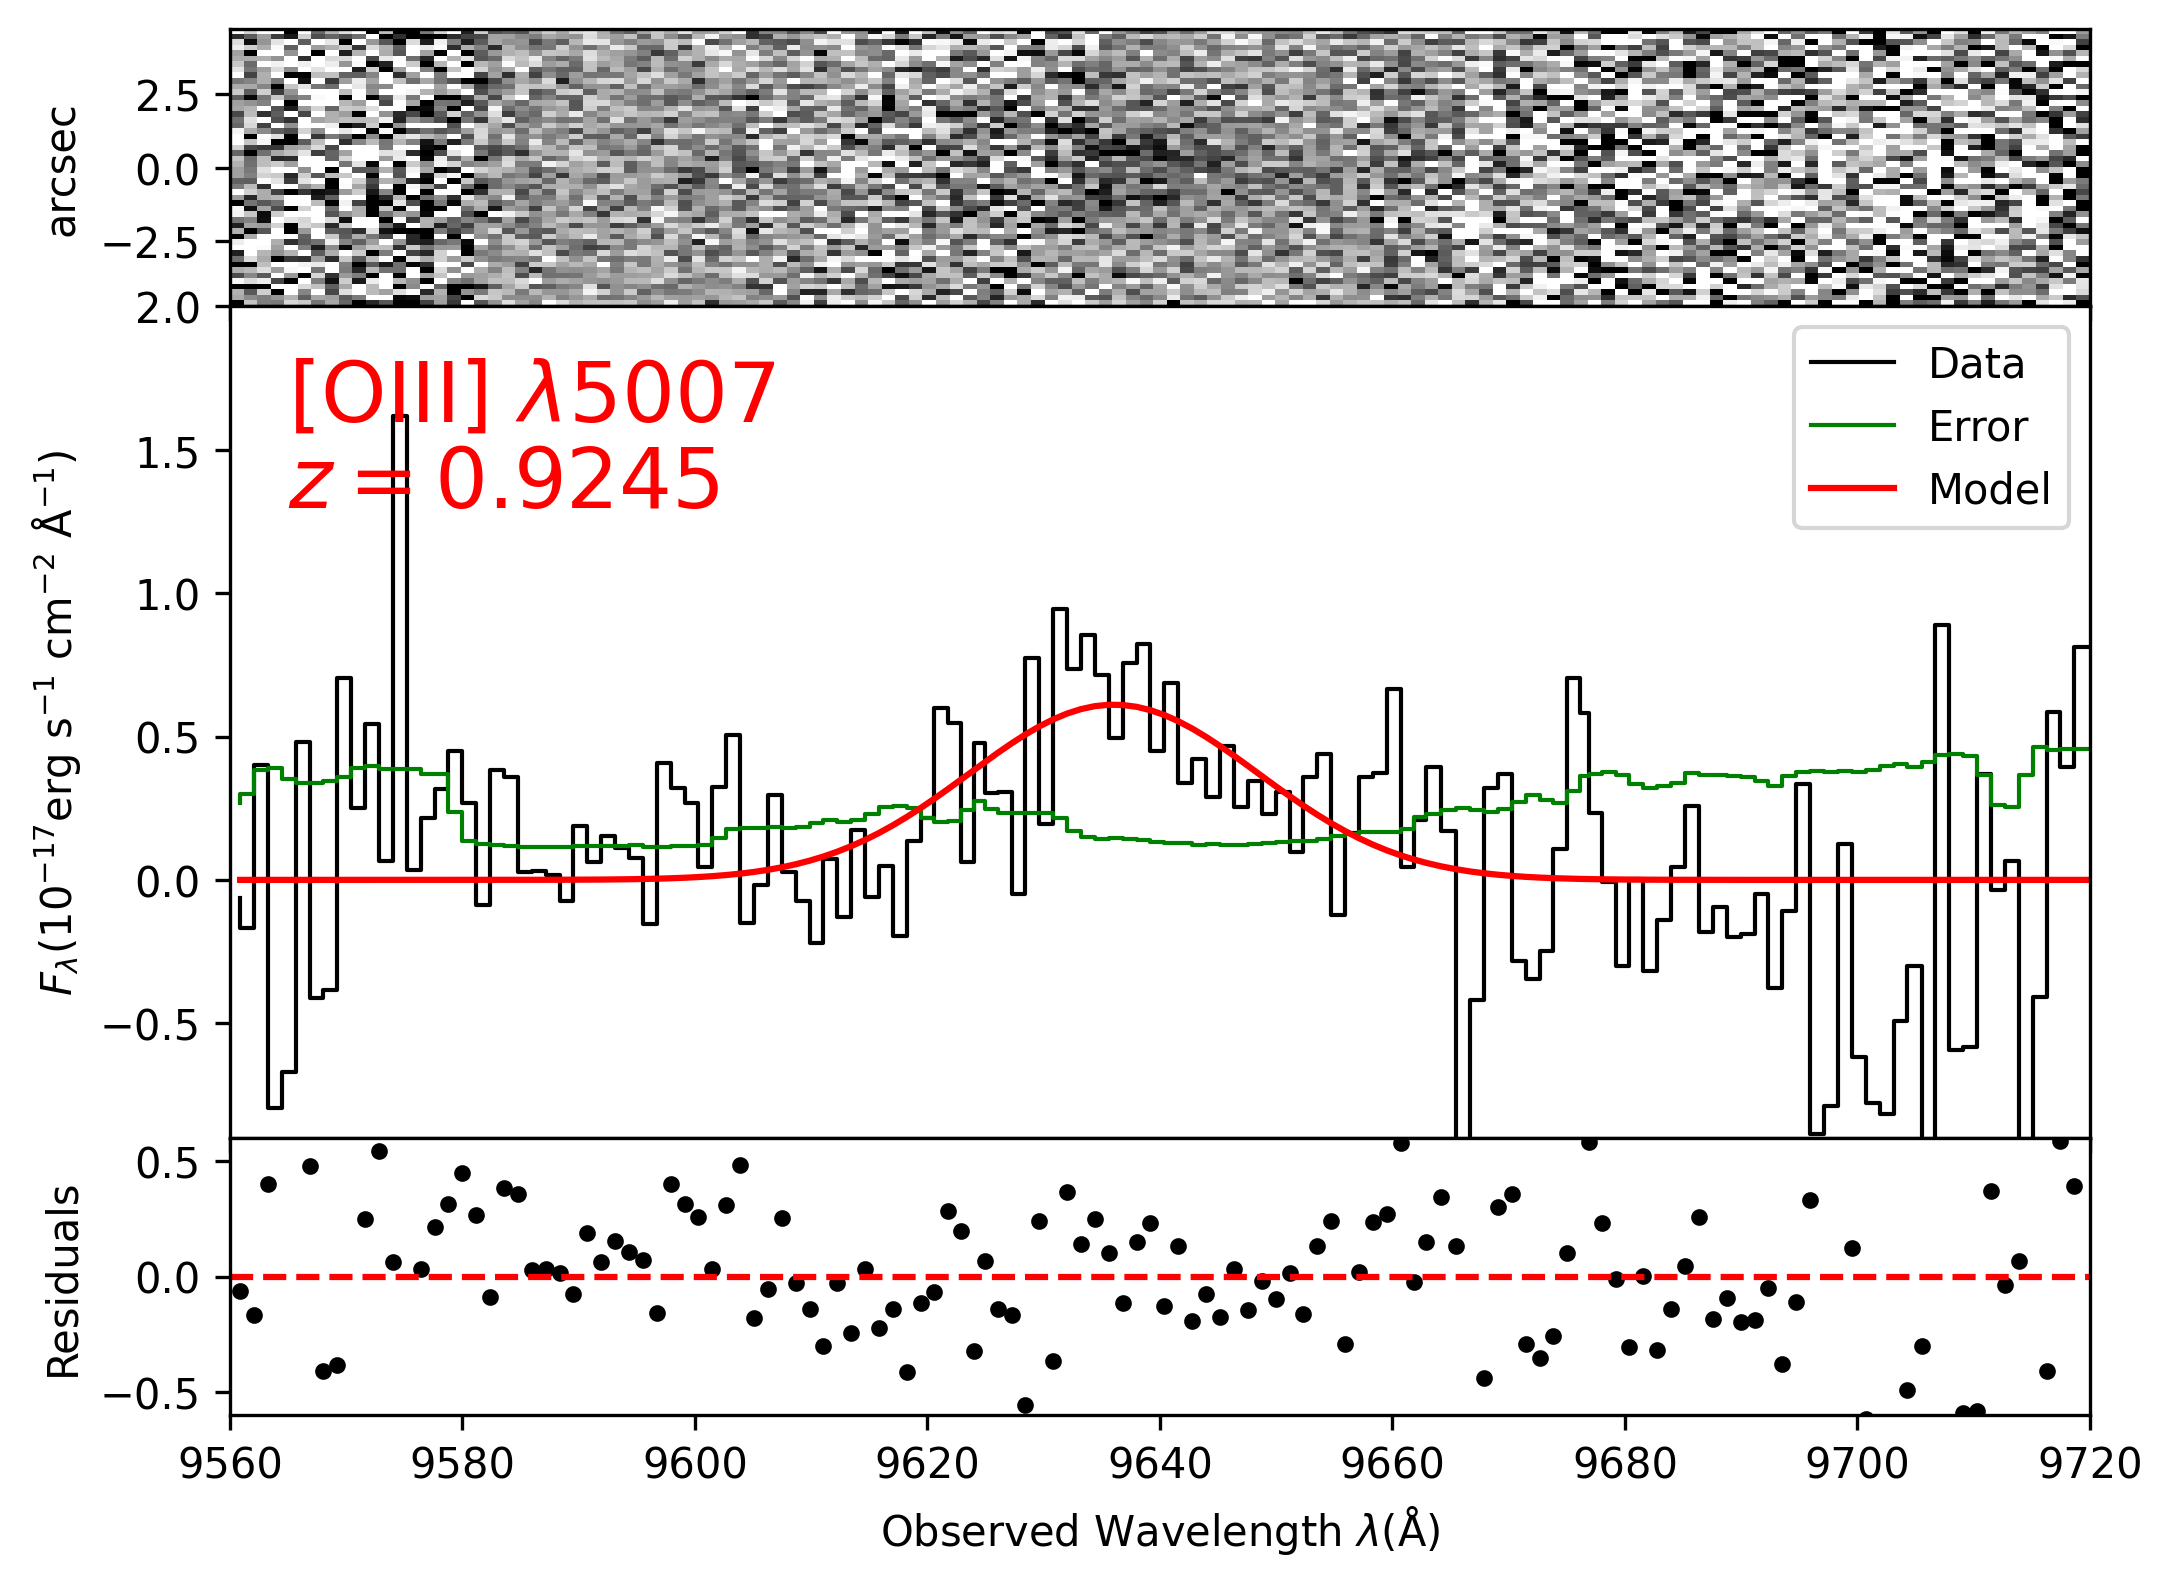

In [9]:
OIII_wave_range = [9560, 9720]
# OIII_space_range = [660, 710]
OIII_space_range = [490, 540]
OIII_flux, OIII_wave, OIII_sig, OIII_error =plot_spec_2d_1d_fit(objsci, objwave, tb, OIII_wave_range, OIII_space_range, label='OIII')

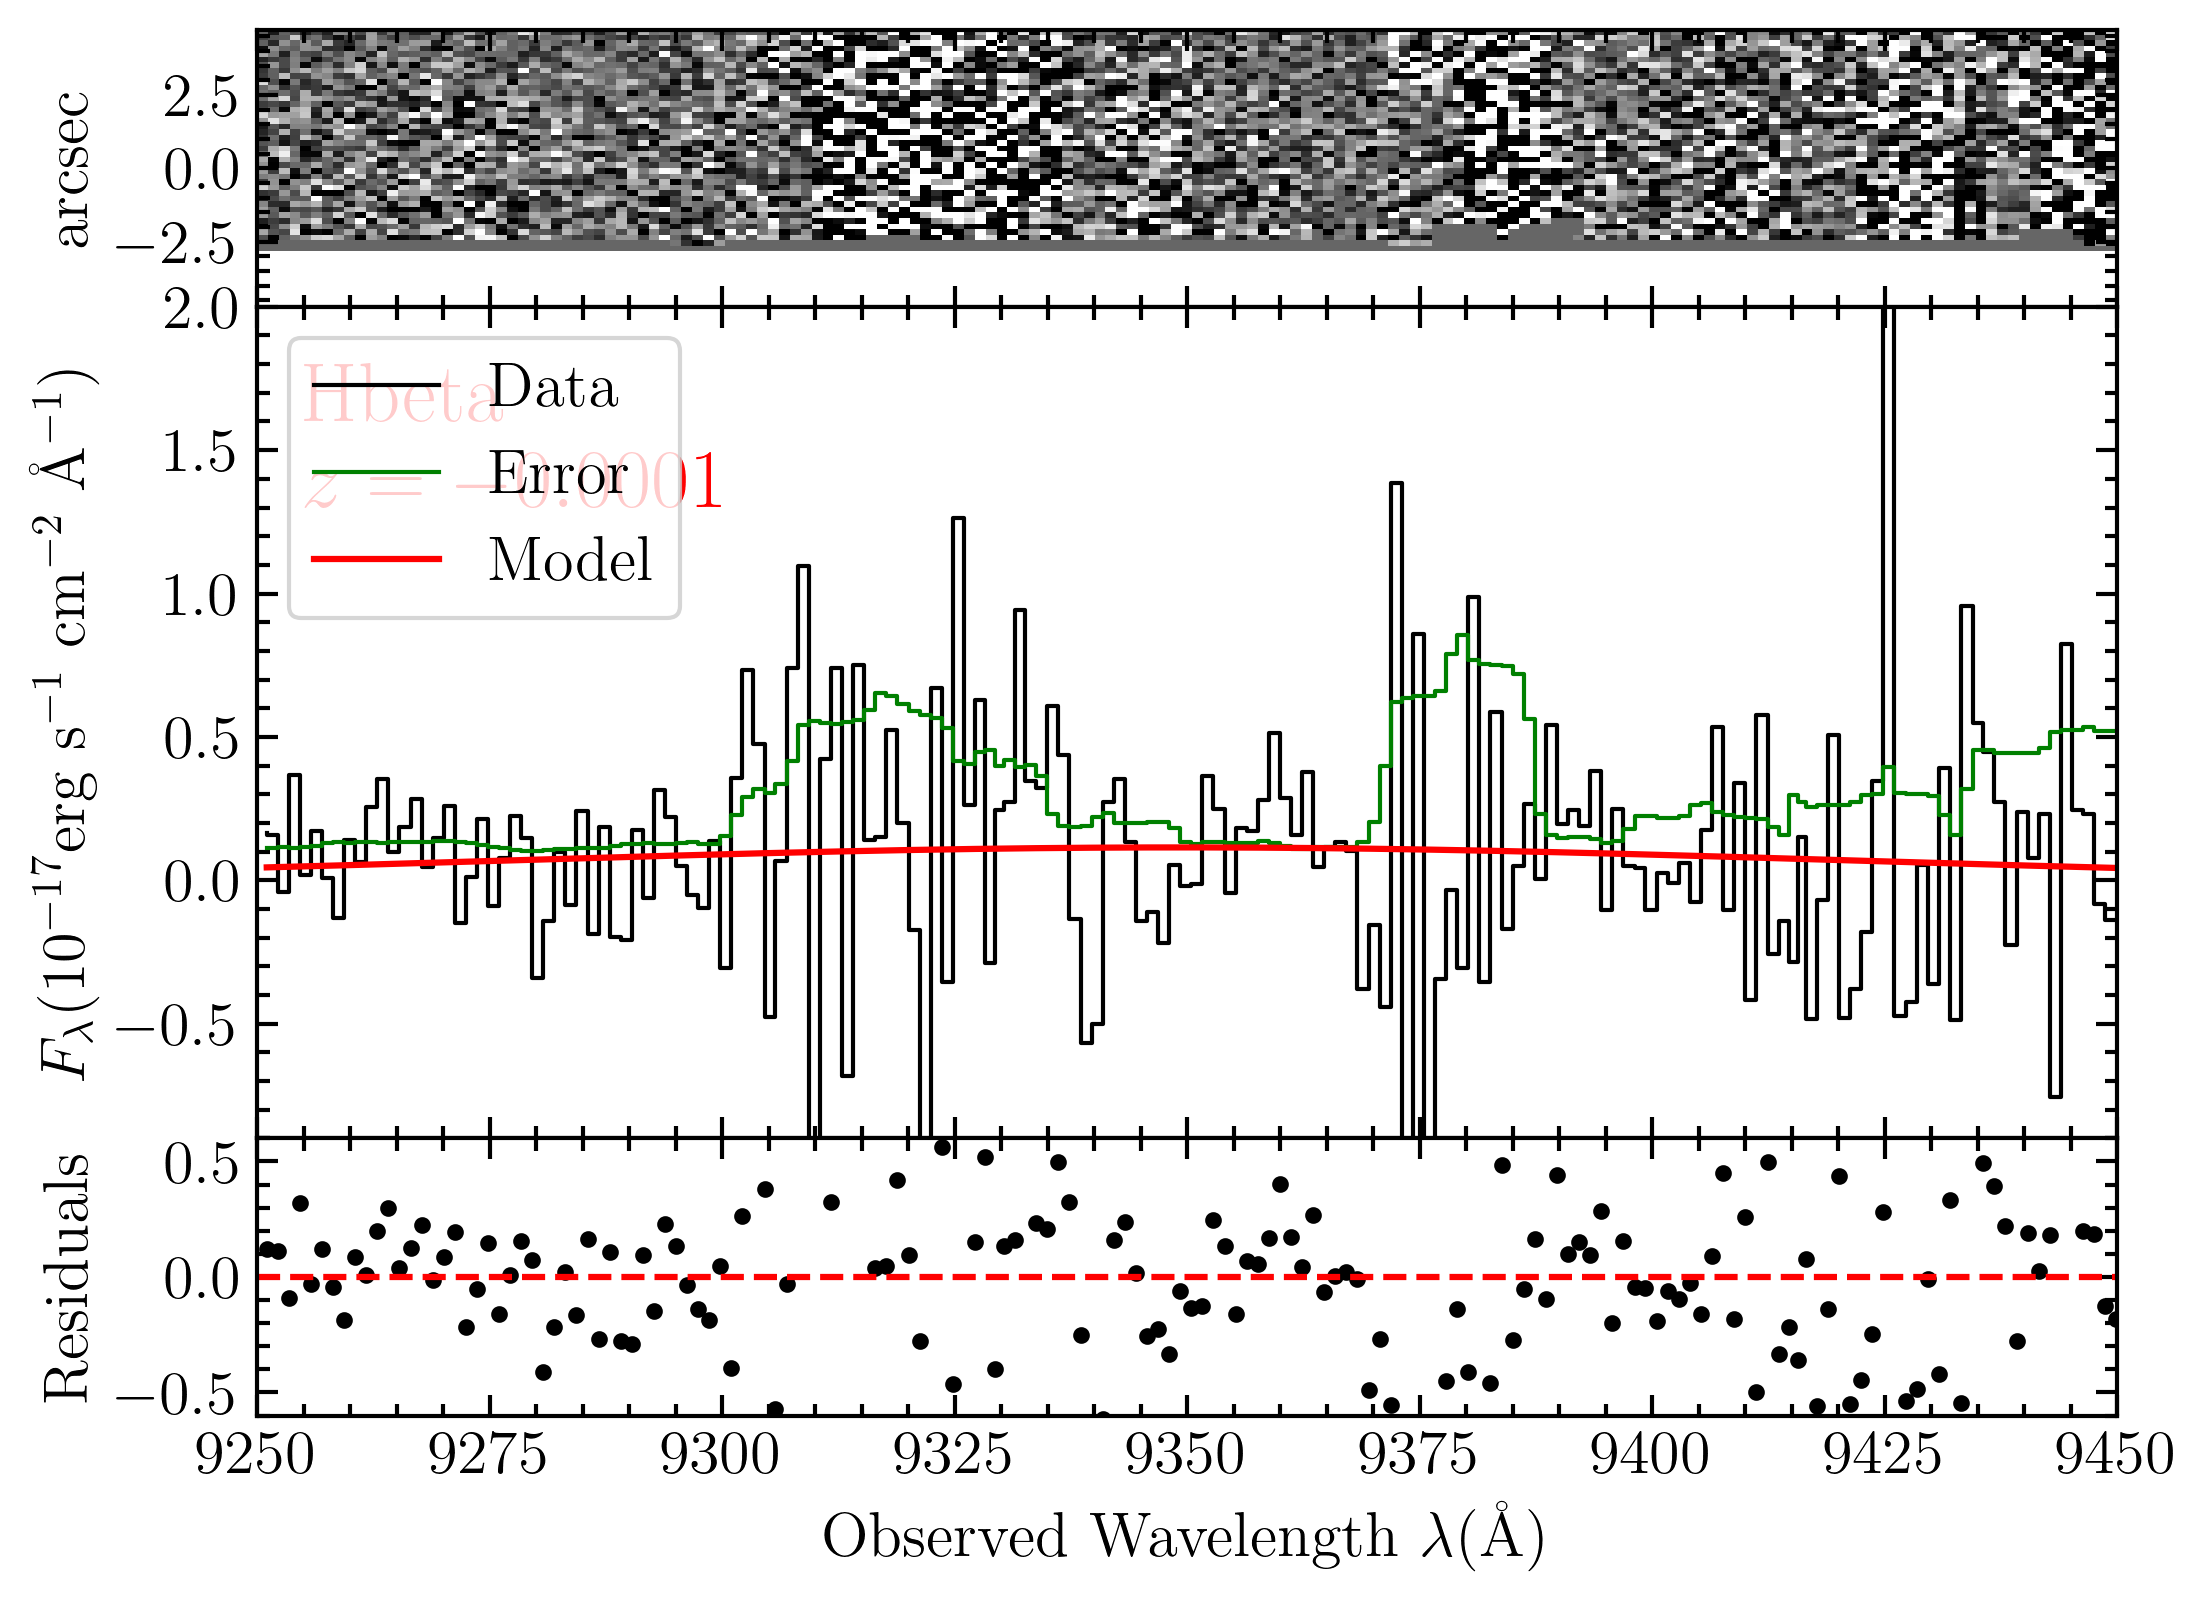

ValueError: too many values to unpack (expected 3)

In [139]:
Hbeta_wave_range = [9250, 9450]
Hbeta_space_range = [660, 710]
Hbeta_wave, Hbeta_sig, Hbeta_flux =plot_spec_2d_1d_fit(objsci, objwave, tb, Hbeta_wave_range, Hbeta_space_range, label='Hbeta')

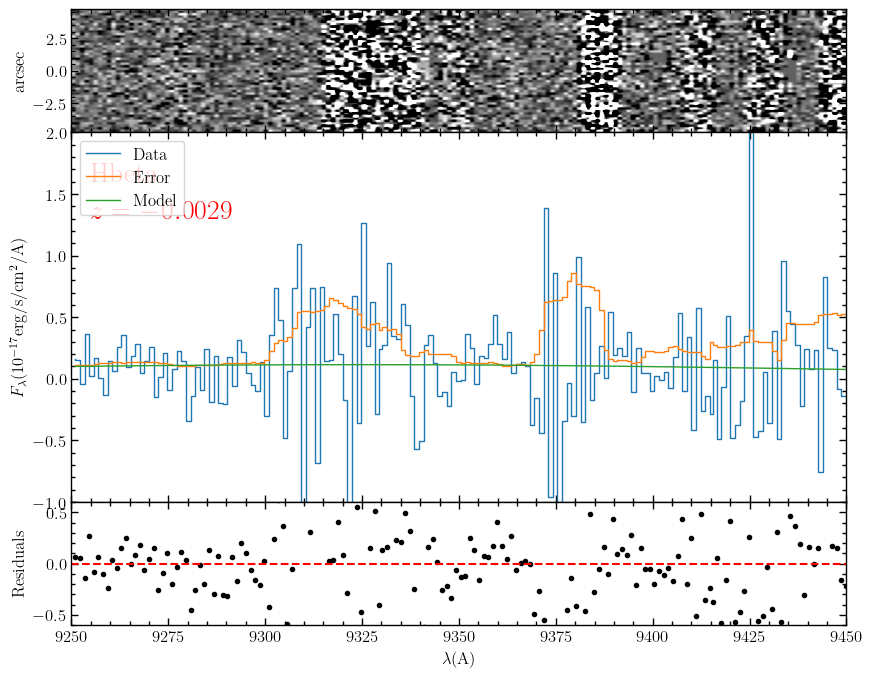

In [13]:
Hbeta_wave_range = [9250, 9450]
Hbeta_space_range = [660, 710]
Hbeta_wave, Hbeta_sig, Hbeta_flux =plot_spec_2d_1d_fit(objsci, objwave, tb, Hbeta_wave_range, Hbeta_space_range, label='Hbeta')

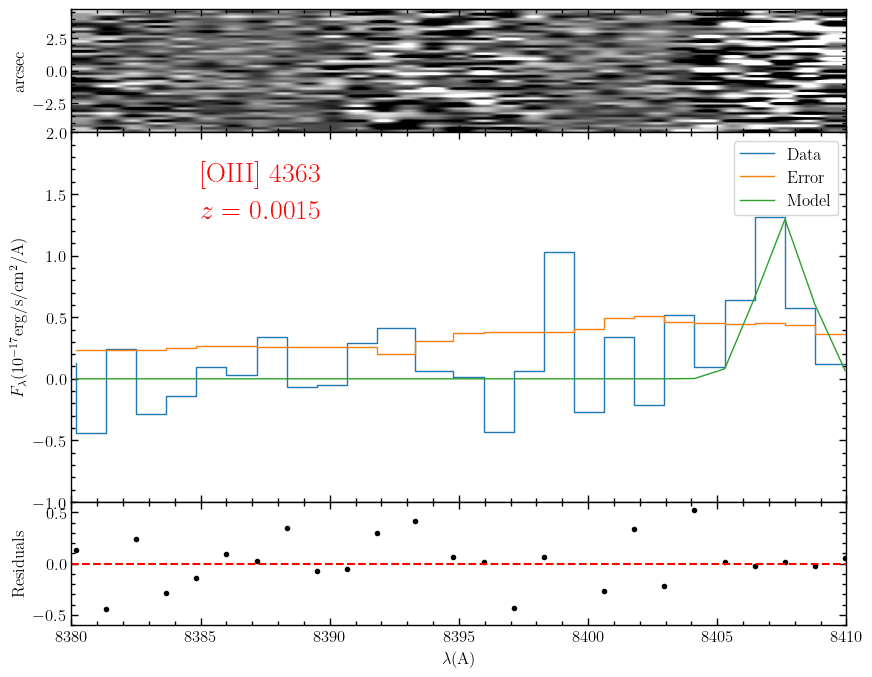

In [51]:
O3_wave_range = [8380, 8410]
O3_space_range = [660, 710]
O3_wave, O3_sig, O3_flux =plot_spec_2d_1d_fit(objsci, objwave, tb, O3_wave_range, O3_space_range, label='[OIII] 4363')

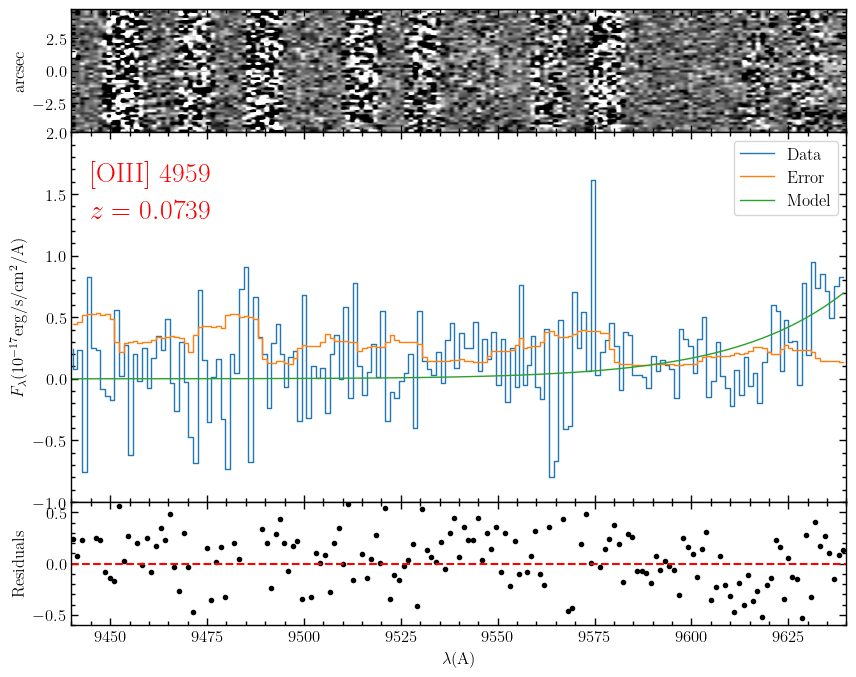

AttributeError: 'NoneType' object has no attribute 'cov_matrix'

In [8]:
O3_wave_range = [9440, 9640]
O3_space_range = [660, 710]
O3_wave, O3_sig, O3_flux =plot_spec_2d_1d_fit(objsci, objwave, tb, O3_wave_range, O3_space_range, label='[OIII] 4959')

In [18]:
OII_flux, OII_wave, OII_sig, OII_error

(Parameter('amplitude', value=0.9993283772553447),
 Parameter('mean', value=7175.720773517465),
 Parameter('stddev', value=9.887400909718115, bounds=(1.1754943508222875e-38, None)),
 array([0.00305926, 0.38358031, 0.37266807]))

In [19]:
OIII_flux, OIII_wave, OIII_sig,OIII_error

(Parameter('amplitude', value=0.6110770473830134),
 Parameter('mean', value=9636.030723076383),
 Parameter('stddev', value=12.44336401549625, bounds=(1.1754943508222875e-38, None)),
 array([0.00203377, 1.44796455, 1.37803625]))

In [51]:
g.cov_matrix

parameter variances / covariances 
amplitude| 0.009
mean     | 0.003, 1.329
stddev   | -0.062, -0.04 ,  1.288

# line ratio calculation

In [10]:
def int_gaussian_line_flux(amplitude, mean, stddev, errors):
    amplitude_err, mean_err, stddev_err = errors
    flux = amplitude * stddev * np.sqrt(2*np.pi)
    flux_err = flux*np.sqrt((stddev_err/stddev)**2 + (amplitude_err/amplitude)**2)
    return flux, flux_err #in unit of 10^-17 erg/s/cm^2

In [12]:
OII_lineflux = int_gaussian_line_flux(OII_flux, OII_wave, OII_sig, OII_error)
OIII_lineflux = int_gaussian_line_flux(OIII_flux, OIII_wave, OIII_sig, OIII_error)
# Hbeta_uplim = np.max(Hbeta_errors)*10 #width of 10 Angstrom

In [16]:
Hbeta_uplim = np.max(Hbeta_errors)*10
Hbeta_uplim

2.3352137175476666

In [15]:
Hbeta_uplim = int_gaussian_line_flux(3*np.mean(Hbeta_errors), OII_wave, OII_sig, OII_error)
Hbeta_uplim

(11.185878821374232, 0.4283726861179935)

In [16]:
O3_uplim = np.max(O3_errors)*10 #width of 10 Angstrom
O3_uplim

3.0264991400716297

In [17]:
O3_uplim = int_gaussian_line_flux(3*np.mean(O3_errors), OII_wave, OII_sig, OII_error)
O3_uplim

(14.504518481760943, 0.5519255402124387)

In [1]:
19.39/11.39

1.7023705004389815

In [14]:
OII_lineflux, OIII_lineflux

((24.767393158827844, 0.9365869814560578),
 (19.060035788761635, 2.1117503724458664))

In [70]:
OII_lineflux, OIII_lineflux, Hbeta_uplim

((24.767393158827844, 0.9365869814560578),
 (19.060035788761635, 2.1117503724458664),
 2.3352137175476666)

In [19]:
19.06/24.77, np.log10(19/25), np.log10(19.060035788761635/24.767393158827844)

(0.769479208720226, -0.11918640771920865, -0.11375658644452998)

In [71]:
O32 = OIII_lineflux/OII_lineflux
OIII_to_Hbeta = OIII_lineflux/Hbeta_uplim
O32, OIII_to_Hbeta

TypeError: unsupported operand type(s) for /: 'tuple' and 'tuple'

In [56]:
O3_rate = OIII_lineflux/O3_uplim
np.log10(O3_rate)

0.7200198946937743

In [20]:
np.log10(O32), np.log10(OIII_to_Hbeta)

(-0.14765832274962035, 0.8796383749706778)

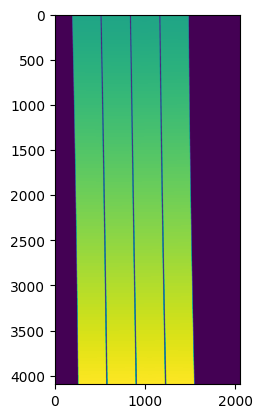

In [64]:
plt.imshow(waveimg)

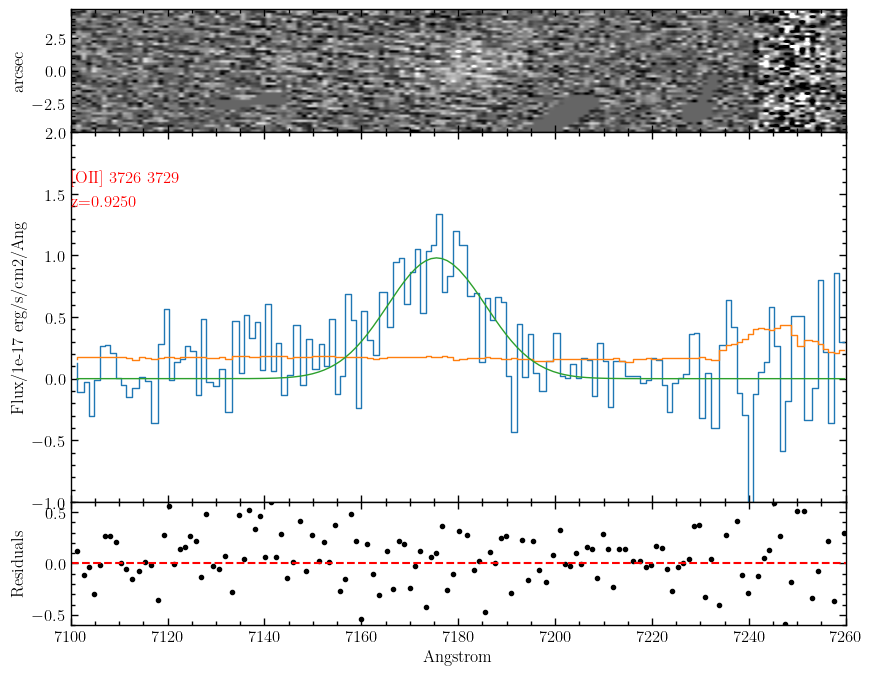

In [69]:
wave = tb['OPT_WAVE']
counts = tb['OPT_FLAM']
errors = tb['OPT_FLAM_SIG']
mask = tb['OPT_MASK']

OII_wave_mask = (wave>7100) & (wave<7260)
OII_wave = wave[mask&OII_wave_mask]
OII_flux = counts[mask&OII_wave_mask]
OII_errors = errors[mask&OII_wave_mask]
OIII_wave_mask = (wave>9560) & (wave<9720)
OIII_wave = wave[mask&OIII_wave_mask]
OIII_flux = counts[mask&OIII_wave_mask]
OIII_errors = errors[mask&OIII_wave_mask]
cut_index = np.where((objwave<7260) & (objwave>7100))[0].min(), np.where((objwave<7260) & (objwave>7100))[0].max()
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 3, 1]}, sharex=True)
fig.subplots_adjust(hspace=0)
ax0.imshow(objsci.T[625:675, cut_index[0]:cut_index[1]], norm=zscale_norm, origin='lower', cmap='gray', extent=[7100, 7260, -25*0.189, 25*0.189])
ax0.set_aspect('auto')
ax0.set_ylabel('arcsec')
# ax0.set_xlim(np.where((objwave<7260) & (objwave>7100))[0].min(), np.where((objwave<7260) & (objwave>7100))[0].max())
# ax0.set_ylim(625, 675)
ax1.step(OII_wave, OII_flux, lw=1)
ax1.step(OII_wave, OII_errors, lw=1)
g_init = models.Gaussian1D(amplitude=1., mean=7180, stddev=20)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, OII_wave, OII_flux)
ax1.plot(OII_wave, g(OII_wave), lw=1)
ax1.set_ylim(-1, 2)
ax1.set_ylabel('Flux/1e-17 erg/s/cm2/Ang')
ax1.text(7100, 1.6, '[OII] 3726 3729', fontsize=12, color='red')
ax1.text(7100, 1.4, 'z=%.4f'%(g.mean/(3729+3726)*2-1), fontsize=12, color='red')
# ax.set_yscale('log')
ax2.plot(OII_wave,  OII_flux-g(OII_wave), 'k.')
ax2.axhline(0, color='red', linestyle='--')
ax2.set_ylim(-0.6, 0.6)
ax2.set_xlabel('Angstrom')
ax2.set_ylabel('Residuals')
plt.show()

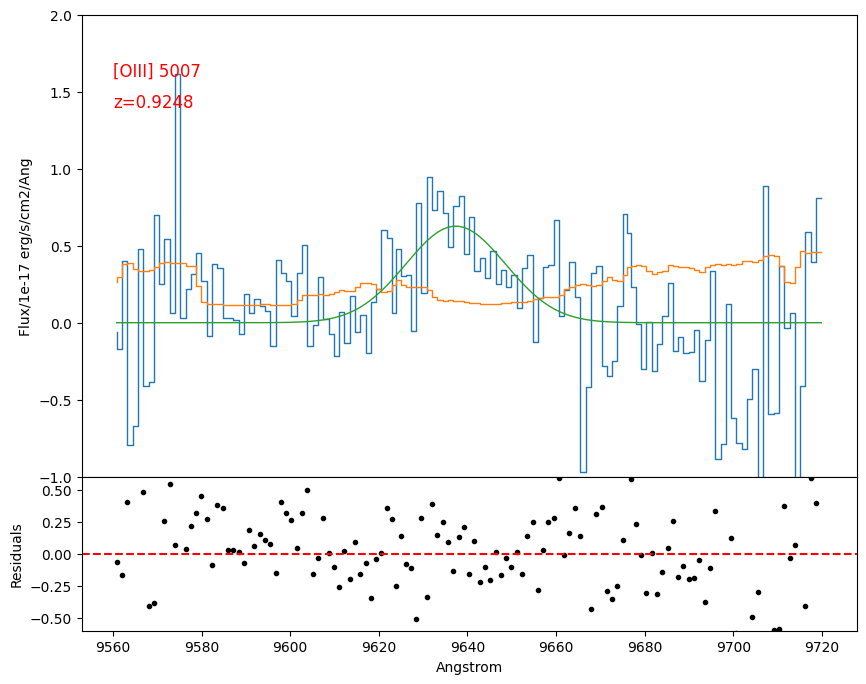

In [44]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
fig.subplots_adjust(hspace=0)
ax1.step(OIII_wave, OIII_flux, lw=1)
ax1.step(OIII_wave, OIII_errors, lw=1)
g_init = models.Gaussian1D(amplitude=1., mean=9639, stddev=20)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, OIII_wave, OIII_flux)
ax1.plot(OIII_wave, g(OIII_wave), lw=1)
ax1.set_ylim(-1, 2)
ax1.set_ylabel('Flux/1e-17 erg/s/cm2/Ang')
ax1.text(9560, 1.6, '[OIII] 5007', fontsize=12, color='red')
ax1.text(9560, 1.4, 'z=%.4f'%(g.mean/5007-1), fontsize=12, color='red')
ax2.plot(OIII_wave,  OIII_flux-g(OIII_wave), 'k.')
ax2.axhline(0, color='red', linestyle='--')
ax2.set_ylim(-0.6, 0.6)
ax2.set_xlabel('Angstrom')
ax2.set_ylabel('Residuals')
plt.show()

In [11]:
tb[['OPT_WAVE', 'OPT_FLAM', 'OPT_FLAM_SIG']][tb['OPT_MASK']].to_pandas().to_csv('fluxed_nebula.csv', index=False)

In [7]:
(14*u.kpc.to(u.km)/3e5)*u.s.to(u.kyr)

45.63030367843683

In [6]:
u.kpc.to(u.km)

3.085677581491367e+16

# velocity and velocity dispersion

In [36]:
R = 1810/2 #VPH-Red 1/5'' slit spectral resolution
dlambda_O2 = OII_wave.value/R
dlambda_O3 = OIII_wave.value/R

In [37]:
dv_O2 = np.sqrt(OII_sig**2 - dlambda_O2**2)
dv_O3 = np.sqrt(OIII_sig**2 - dlambda_O3**2)
dv_O2, dv_O3

(5.90695185869997, 6.439490252664611)

$\frac{\Delta \lambda}{\lambda} = \frac{\Delta v}{c}$

$\Delta z = \frac{v}{c}$

In [38]:
dv_O2_phy = dv_O2/OII_wave.value*3e5
dv_O3_phy = dv_O3/OIII_wave.value*3e5
dv_O2_phy, dv_O3_phy #km/s

(246.9557572738902, 200.48162270518634)

In [39]:
dv_O2_phy = dv_O2/O2_wave*3e5
dv_O3_phy = dv_O3/O3_wave*3e5
dv_O2_phy, dv_O3_phy #km/s

(475.283196937841, 385.7337259794625)

In [29]:
O2_wave = (3727.092+3729.875)/2
O3_wave = 5008.240

In [17]:
z = 0.924
O2_wave_obs = O2_wave*(1+z)
O3_wave_obs = O3_wave*(1+z)
# v_O3 = (OIII_wave.value - O3_wave_obs)/O3_wave_obs*3e5
# v_O2 = (OII_wave.value - O2_wave_obs)/O2_wave_obs*3e5
v_O3 = (OIII_wave.value - O3_wave_obs)/O3_wave*3e5
v_O2 = (OII_wave.value - O2_wave_obs)/O2_wave*3e5
v_O3_err = (OIII_error[1])/O3_wave*3e5
v_O2_err = (OII_error[1])/O2_wave*3e5
v_O2, v_O3, v_O2_err, v_O3_err

(170.45961320184307, 10.600315263419287, 30.86351140537198, 86.73493408373716)

In [20]:
OIII_wave, O3_wave_obs

(Parameter('mean', value=9636.030723076383), 9635.85376)

In [21]:
OII_wave, O2_wave_obs

(Parameter('mean', value=7175.720773517465), 7173.602254)

# Determine temperature by O3 ratio

In [43]:
def plot_ne_T(OIII_ratio, ax):
    '''
    OIII_ratio = (OIII_5007+OIII_4959)/OIII_4363
    '''
    T = np.linspace(100, 30000, 1000)
    ne = (7.9*np.exp(3.29*1e4/T)/OIII_ratio - 1)*T**0.5/4.5/1e-4
    mask = (ne<1000) & (ne>0)
    ax.plot(ne[mask], T[mask])
    ax.set_ylabel('Temperature (K)')
    ax.set_xlabel('Electron Density (cm$^{-3}$)')

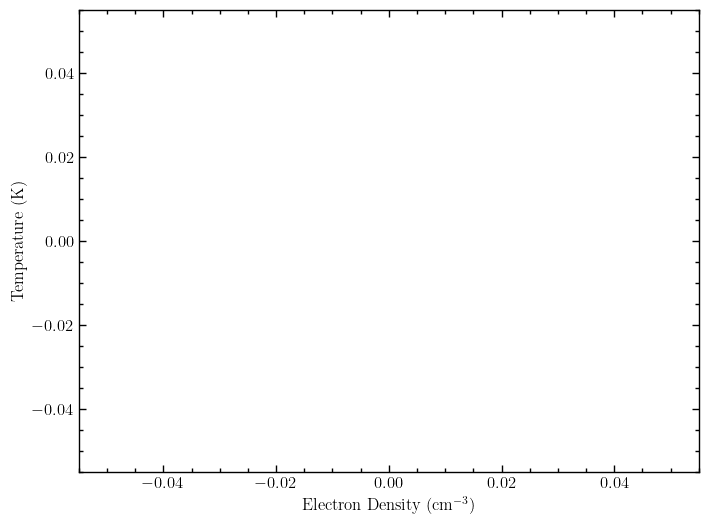

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))
ratios = np.linspace(0.1, 5, 5)
for rate in ratios:
    plot_ne_T(rate, ax)
# ax.set_xlim(0, 1000)
plt.show()

Calculate gas mass from Q

In [19]:
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.cosmology import FlatLambdaCDM
cos = FlatLambdaCDM(70 * u.km / u.s / u.Mpc, Om0 = 0.3,)
z = 0.924
lum_dis = cos.luminosity_distance(z)

In [27]:
lum_dis

<Quantity 5992.88915976 Mpc>

In [60]:
def line_luminosity(flux, lum_dis, z):
    return 4*np.pi*lum_dis**2*flux
def int_Q(amplitude, mean, stddev):
    waves = np.linspace(mean-5*stddev, mean+5*stddev, 10000)*u.AA
    freqs = np.flip((const.c/waves).to(u.Hz))
    flux_nu = amplitude*np.exp(-(waves.value-mean)**2/2/stddev**2)*1e-17*u.erg/u.s/u.cm**2/u.AA*(waves**2/const.c)
    flux_nu = flux_nu.to(u.erg/u.s/u.cm**2/u.Hz)
    lum_nu = line_luminosity(flux_nu, lum_dis, z).to(u.erg)
    hnu = (const.h*freqs).to(u.erg)
    func = lum_nu/hnu.value #unitless
    return np.trapz(y=func.value, x=freqs.value)*u.Hz #dnu gives the unit of Hz

In [62]:
Q_O2 = int_Q(OII_flux, OII_wave, OII_sig)
Q_O3_5007 = int_Q(OIII_flux, OIII_wave, OIII_sig)
Q_O3_4959 = Q_O3_5007/3
print(Q_O2, Q_O3_5007, Q_O3_4959)

3.844639211841977e+53 Hz 3.9731160314394274e+53 Hz 1.3243720104798091e+53 Hz


In [63]:
np.savetxt('Q_O2_O3_spec.txt', [Q_O2.value, Q_O3_5007.value, Q_O3_4959.value])